In [1]:
#importing libraries for Webscraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

Note:both excel file and notebook file need to be in same location in pc 

In [3]:
#reading the excel file which contain URLs

input_df=pd.read_excel('input(1).xlsx')

In [4]:
input_df.head()

,URL_ID,URL
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...
4,Netclan20241021,https://insights.blackcoffer.com/development-o...


After going through HTML structures of various pages in the list it was observed that there are 2 types of html structures with different class names, the webscraping examples of both pages is shown below  

In [6]:
#webscraping example of type 1 page 

def scraping(url):
    page1=requests.get(url)
    soup=BeautifulSoup(page1.text,'html.parser')
    title=soup.find('h1').get_text().strip()
    article_text=soup.find('div',class_='td-post-content tagdiv-type').get_text().strip()
    text={'title': title, 'article_text': article_text}
    return text

In [7]:
#testing for blackassign001

url='https://insights.blackcoffer.com/data-from-crm-via-zapier-to-google-sheets-dynamic-to-powerbi/'
print(scraping(url))

{'title': 'Data from CRM via Zapier to Google Sheets (Dynamic) to PowerBI', 'article_text': 'Client BackgroundClient:\xa0A leading solar panel firm in the USAIndustry Type:\xa0EnergyServices: Solar PanelOrganization Size:\xa0500+The ProblemSolar Panel organization from America wants to keep track of sales data. They want to see the leadership dashboard of their organization in terms of sales. They also want to keep track of their campaigns and leads generated from sources of those campaigns. They want to keep track of sales data from different sources.\xa0\xa0Our SolutionFirst, we fetch the data from CRM to PowerBI. Clean the data of CRM using DAX and then perform calculations on the data. Using cleaned data, we build KPI on PowerBI.Solution ArchitectureTo complete the project, we follow the following data flow pipeline:Data from CRM 🡪 Zapier 🡪 Google Sheet (Dynamic) 🡪PowerBI\xa0Language/techniques usedPowerBI, DAX LanguageSkills usedCRM, Zapier , PowerBI, Google SheetWhat are the tech

In [8]:
#webscraping example of type 2 page

def scraping2(url):
    page2=requests.get(url)
    soup=BeautifulSoup(page2.text,'html.parser')
    title=soup.find('h1').get_text().strip()
    article_text=soup.find('div',class_='td_block_wrap tdb_single_content tdi_130 td-pb-border-top td_block_template_1 td-post-content tagdiv-type').get_text().strip()
    article_text = article_text.replace('\n', '')
    text={'title': title, 'article_text': article_text}
    return text

In [9]:
#testing for blackassign0100

url='https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work-2/'
len(scraping2(url)['article_text'])

6703

In [10]:
#empty list to store all the scraped data

extracted_texts=[]

In [11]:
#function to scrape all the web articles 

def web_scraping(url):
    try:
        page=requests.get(url)
        soup=BeautifulSoup(page.text,'html.parser')
        title=soup.find('h1').get_text().strip()
        article_text=soup.find('div',class_='td-post-content tagdiv-type')
        if article_text:
            article_text=article_text.get_text().strip()
        else:
            article_text = soup.find('div', class_='td_block_wrap tdb_single_content tdi_130 td-pb-border-top td_block_template_1 td-post-content tagdiv-type').get_text().strip()
        article_text = article_text.replace('\n', ' ')
        text=title+article_text
        return text
    
#code to show error if there is an error scraping 

    except Exception:
        print('Error from '+url+' -This Article has been ' )
        return None

In [12]:
#calling the function and iterating each row of input dataframe
for index,row in input_df.iterrows():
    url_id=row['URL_ID']
    url=row['URL']
    text=web_scraping(url)
    
#adding scraped data to the empty list and creating a dataframe
    if text:
        extracted_texts.append({'URL_ID': url_id,'URL':url, 'Text': text})
text_df=pd.DataFrame(extracted_texts)


Error from https://insights.blackcoffer.com/a-leading-musical-instrumental-website-seo-optimization/ -This Article has been 


In [13]:
df=text_df.copy()

In [14]:
#checking length of raw text
text_df['Text_length']=text_df['Text'].apply(lambda x :len(x))

In [15]:
text_df

,URL_ID,URL,Text,Text_length
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...,AI and ML-Based YouTube Analytics and Content ...,1956
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...,Enhancing Front-End Features and Functionality...,5395
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...,ROAS Dashboard for Campaign-Wise Google Ads Bu...,2912
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...,Efficient Processing and Analysis of Financial...,4547
4,Netclan20241021,https://insights.blackcoffer.com/development-o...,Development of EA Robot for Automated TradingO...,4775
...,...,...,...,...
141,Netclan20241159,https://insights.blackcoffer.com/population-an...,Population and Community Survey of AmericaClie...,5899
142,Netclan20241160,https://insights.blackcoffer.com/google-lsa-ap...,Google LSA API Data Automation and Dashboardin...,8856
143,Netclan20241161,https://insights.blackcoffer.com/healthcare-da...,Healthcare Data AnalysisClient BackgroundClien...,2485
144,Netclan20241162,https://insights.blackcoffer.com/budget-sales-...,"Budget, Sales KPI Dashboard using Power BIProj...",884


In [16]:
#removing the author info at the end of the article which are not relavent
trailing_sentence = 'Summarized: https://blackcoffer.com/'
# Function to remove the trailing sentence
def remove_trailing_sentence(text):
    # Find the index of the trailing sentence
    trailing_index = text.find(trailing_sentence)
    if trailing_index != -1:
        return text[:trailing_index].strip()
    else:
        return text

# Applying the function to remove the author info
text_df['text'] = text_df['Text'].apply(remove_trailing_sentence)
text_df['text_length']=text_df['text'].apply(lambda x :len(x))

In [17]:
text_df

,URL_ID,URL,Text,Text_length,text,text_length
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...,AI and ML-Based YouTube Analytics and Content ...,1956,AI and ML-Based YouTube Analytics and Content ...,1517
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...,Enhancing Front-End Features and Functionality...,5395,Enhancing Front-End Features and Functionality...,4956
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...,ROAS Dashboard for Campaign-Wise Google Ads Bu...,2912,ROAS Dashboard for Campaign-Wise Google Ads Bu...,2473
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...,Efficient Processing and Analysis of Financial...,4547,Efficient Processing and Analysis of Financial...,4108
4,Netclan20241021,https://insights.blackcoffer.com/development-o...,Development of EA Robot for Automated TradingO...,4775,Development of EA Robot for Automated TradingO...,4775
...,...,...,...,...,...,...
141,Netclan20241159,https://insights.blackcoffer.com/population-an...,Population and Community Survey of AmericaClie...,5899,Population and Community Survey of AmericaClie...,5899
142,Netclan20241160,https://insights.blackcoffer.com/google-lsa-ap...,Google LSA API Data Automation and Dashboardin...,8856,Google LSA API Data Automation and Dashboardin...,8856
143,Netclan20241161,https://insights.blackcoffer.com/healthcare-da...,Healthcare Data AnalysisClient BackgroundClien...,2485,Healthcare Data AnalysisClient BackgroundClien...,2485
144,Netclan20241162,https://insights.blackcoffer.com/budget-sales-...,"Budget, Sales KPI Dashboard using Power BIProj...",884,"Budget, Sales KPI Dashboard using Power BIProj...",884


Text(0.5, 1.0, 'length of text before and after removing author')

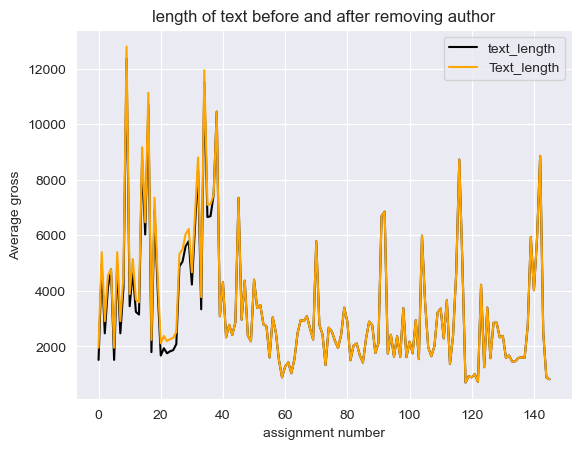

In [18]:
#graph to check if there are any anamolies while removing author info
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Plot the scatter plot
sns.lineplot(text_df['text_length'], color='black', label='text_length')
sns.lineplot(text_df['Text_length'], color='orange', label='Text_length')
plt.ylabel('Average gross')
plt.xlabel('assignment number')
plt.title('length of text before and after removing author')


In [19]:
x=text_df[text_df['URL_ID']=='Netclan20241017']['text'].iloc[0]
print(x)

AI and ML-Based YouTube Analytics and Content Creation Tool for Optimizing Subscriber Engagement and Content StrategyClient BackgroundClient: A leading IT & tech firm in the USAIndustry Type: ITProducts & Services: IT Consulting, IT Support, SaaS, Marketing StrategyOrganization Size: 10+The ProblemBuilding AI and ML based YouTube analytics and content creation tool that will help youtuber to understand their subscriber’s watching behaviour, help them in content research, creation and publication. Our SolutionCreated a MERN stack web application and integrated AI models to helps youtuber to generated titles, descriptions, tags, hashtags, captions etc. Help them to check thumbnail quality, analysis on the videos using video auditor tool, analysis on comments using sentiments analysis, help to under their subscribers using churn predication AI model. Solution Architecture https://www.figma.com/file/WQs01mmmNBZ1SjNE2IV8Sl/Youtube-Web-App-By-SHiV?type=design&node-id=0-1&mode=design&t=Lh2jRx

In [20]:
#removing Excess columns
text_df = text_df.drop(columns=['Text', 'Text_length'])

In [21]:
text_df

,URL_ID,URL,text,text_length
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...,AI and ML-Based YouTube Analytics and Content ...,1517
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...,Enhancing Front-End Features and Functionality...,4956
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...,ROAS Dashboard for Campaign-Wise Google Ads Bu...,2473
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...,Efficient Processing and Analysis of Financial...,4108
4,Netclan20241021,https://insights.blackcoffer.com/development-o...,Development of EA Robot for Automated TradingO...,4775
...,...,...,...,...
141,Netclan20241159,https://insights.blackcoffer.com/population-an...,Population and Community Survey of AmericaClie...,5899
142,Netclan20241160,https://insights.blackcoffer.com/google-lsa-ap...,Google LSA API Data Automation and Dashboardin...,8856
143,Netclan20241161,https://insights.blackcoffer.com/healthcare-da...,Healthcare Data AnalysisClient BackgroundClien...,2485
144,Netclan20241162,https://insights.blackcoffer.com/budget-sales-...,"Budget, Sales KPI Dashboard using Power BIProj...",884


# Text Analysis

In [23]:
#import for text analysis
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize,TextTilingTokenizer
nltk.download('punkt')
nltk.download('stopwords')
import string
import textstat

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asuna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asuna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Note:for sentiment analysis the stopwords given in the file were used and for all other actions stopwords from NLTK library were used 

In [25]:
def load_words_from_file(filename):
    """
    Load words from a text file, with one word per line.
    Each word will be stripped of any whitespace.
    """
    words = set()
    with open(filename, 'r') as file:
        for line in file:
            # Split on the '|' character if it's used for categorization
            parts = line.strip().split('|')
            word = parts[0].strip()  # Take the word part before '|'
            words.add(word)
    return words
load_words_from_file('StopWords_DatesandNumbers.txt')

{'ANNUAL',
 'ANNUALLY',
 'ANNUM',
 'APR',
 'APRIL',
 'AUG',
 'AUGUST',
 'BILLION',
 'DAILY',
 'DATE',
 'DAY',
 'DEC',
 'DECEMBER',
 'EIGHT',
 'EIGHTEEN',
 'EIGHTH',
 'EIGHTY',
 'ELEVEN',
 'FEB',
 'FEBRUARY',
 'FIFTEEN',
 'FIFTH',
 'FIFTY',
 'FIRST',
 'FIVE',
 'FORTY',
 'FOUR',
 'FOURTEEN',
 'FOURTH',
 'FRIDAY',
 'HUNDRED',
 'I',
 'II',
 'III',
 'IV',
 'IX',
 'JAN',
 'JANUARY',
 'JUL',
 'JULY',
 'JUN',
 'JUNE',
 'MAR',
 'MARCH',
 'MAY',
 'MILLION',
 'MONDAY',
 'MONTH',
 'MONTHLY',
 'NINE',
 'NINETEEN',
 'NINETY',
 'NINTH',
 'NOV',
 'NOVEMBER',
 'OCT',
 'OCTOBER',
 'ONE',
 'QTR',
 'QUARTER',
 'QUARTERLY',
 'SATURDAY',
 'SECOND',
 'SEP',
 'SEPT',
 'SEPTEMBER',
 'SEVEN',
 'SEVENTEEN',
 'SEVENTH',
 'SEVENTY',
 'SIX',
 'SIXTEEN',
 'SIXTH',
 'SIXTY',
 'SUNDAY',
 'TEN',
 'TENTH',
 'THIRD',
 'THIRTEEN',
 'THIRTY',
 'THOUSAND',
 'THREE',
 'THURSDAY',
 'TRILLION',
 'TUESDAY',
 'TWELVE',
 'TWENTY',
 'TWO',
 'V',
 'VI',
 'VII',
 'VIII',
 'WEDNESDAY',
 'WEEK',
 'WEEKLY',
 'X',
 'XI',
 'XII',
 'XIII'

In [26]:
def load_words_from_file(filename):
    """
    Load words from a text file, with one word per line.
    Each word will be stripped of any whitespace.
    """
    words = set()
    with open(filename, 'r',encoding='latin-1') as file:
        for line in file:
            # Split on the '|' character if it's used for categorization
            parts = line.strip().split('|')
            word = parts[0].strip()  # Take the word part before '|'
            words.add(word)
    return words
# Load stop words
stop_files=['StopWords_Auditor.txt','StopWords_Currencies.txt','StopWords_DatesandNumbers.txt','StopWords_Generic.txt','StopWords_GenericLong.txt','StopWords_Geographic.txt','StopWords_Names.txt']
stop_words_s=set()
for file in stop_files:
    stop_words_s.update(load_words_from_file(file))

# Load positive words
positive_words = load_words_from_file('positive-words.txt')

# Load negative words
negative_words = load_words_from_file('negative-words.txt')

In [27]:
with open('positive-words.txt') as f:
    contents = f.readlines()
contents

['a+\n',
 'abound\n',
 'abounds\n',
 'abundance\n',
 'abundant\n',
 'accessable\n',
 'accessible\n',
 'acclaim\n',
 'acclaimed\n',
 'acclamation\n',
 'accolade\n',
 'accolades\n',
 'accommodative\n',
 'accomodative\n',
 'accomplish\n',
 'accomplished\n',
 'accomplishment\n',
 'accomplishments\n',
 'accurate\n',
 'accurately\n',
 'achievable\n',
 'achievement\n',
 'achievements\n',
 'achievible\n',
 'acumen\n',
 'adaptable\n',
 'adaptive\n',
 'adequate\n',
 'adjustable\n',
 'admirable\n',
 'admirably\n',
 'admiration\n',
 'admire\n',
 'admirer\n',
 'admiring\n',
 'admiringly\n',
 'adorable\n',
 'adore\n',
 'adored\n',
 'adorer\n',
 'adoring\n',
 'adoringly\n',
 'adroit\n',
 'adroitly\n',
 'adulate\n',
 'adulation\n',
 'adulatory\n',
 'advanced\n',
 'advantage\n',
 'advantageous\n',
 'advantageously\n',
 'advantages\n',
 'adventuresome\n',
 'adventurous\n',
 'advocate\n',
 'advocated\n',
 'advocates\n',
 'affability\n',
 'affable\n',
 'affably\n',
 'affectation\n',
 'affection\n',
 'affe

In [28]:
# Load positive words
positive_words = load_words_from_file('positive-words.txt')

# Load negative words
negative_words = load_words_from_file('negative-words.txt')

In [29]:
#function for sentimental analysis

def seniment(text):
    #removing punctuatuins
    t=text.translate(str.maketrans('','',string.punctuation))
    tokens=word_tokenize(t)
    #removing stopwords
    tokens=[word for word in tokens if word.lower() not in stop_words_s]
    total_words_aftercleaning=len(tokens)
    positive_score=sum(1 for word in tokens if word in positive_words)
    negative_score=sum(1 for word in tokens if word in negative_words)
    polarity_score=(positive_score-negative_score)/((positive_score+negative_score)+0.000001)
    subjective_score=(positive_score+negative_score)/(total_words_aftercleaning+0.000001)
    return positive_score,negative_score,polarity_score,subjective_score

text_df[['positve_score','negative_score','polarity_score','subjective_score']]=text_df['text'].apply(seniment).apply(pd.Series)


In [30]:
from nltk.corpus import stopwords

In [31]:
#function for Average Sentence length

def average_sentence_length(text):
    t=text.translate(str.maketrans('','',string.punctuation))
    sentences=sent_tokenize(text)
    total_sentences=len(sentences)
    total_words=len(word_tokenize(t))
    return total_words/total_sentences if total_sentences>0 else 0


text_df['average_sentence_length']=text_df['text'].apply(average_sentence_length)


In [32]:
#function for percentage of complex words and complex words

def percentage_complex(text):
    t=text.translate(str.maketrans('','',string.punctuation))
    words=word_tokenize(t)
    total_words=len(words)
    complex_words=[word for word in words if word.lower() not in stopwords.words('english') and len(word)>2]
    total_complex_words=len(complex_words)
    return 100*(total_complex_words/total_words),total_complex_words

text_df[['percentage_of_complexwords','total_complex_words']]=text_df['text'].apply(percentage_complex).apply(pd.Series)

In [33]:
#fog index

text_df['fog_index']=0.4*(text_df['average_sentence_length']+text_df['percentage_of_complexwords'])

In [34]:
#clean word count

def clean_words(text):
    t=text.translate(str.maketrans('','',string.punctuation))
    words=word_tokenize(t)
    clean_words=[word for word in words if word.lower() not in stopwords.words('english')]
    clean_words_count=len(clean_words)
    return clean_words_count

text_df['clean_word_count']=text_df['text'].apply(clean_words)

In [35]:
#function for syllable count 
def count_syllables(word):
    vowels = 'aeiouy'
    count = 0
    prev_char_was_vowel = False
    exceptions = ["es", "ed"]  # Exceptions to syllable counting
    
    for char in word:
        if char.lower() in vowels:
            if not prev_char_was_vowel:
                count += 1
                prev_char_was_vowel = True
        else:
            prev_char_was_vowel = False
    
    # Handle exceptions
    for exception in exceptions:
        if word.endswith(exception):
            count -= 1
    
    # Ensure at least one syllable for words with no vowels
    count = max(count, 1)
    
    return count

# Tokenize the text and count syllables for each word
def count_syllables_in_text(text):
    t=text.translate(str.maketrans('','',string.punctuation))
    words = word_tokenize(t)
    syllable_counts = sum(count_syllables(word) for word in words)
    return syllable_counts


text_df['syllable_count']=text_df['text'].apply(count_syllables_in_text)

In [36]:
#function for personal pronouns

def personal_pronouns(text):
    pp=text.lower().count('i')+text.lower().count('me')+text.lower().count('my')+text.lower().count('we')+text.lower().count('us')+text.lower().count('our')
    return pp

text_df['personal_pronouns']=text_df['text'].apply(personal_pronouns)

In [37]:
#function for average word length

def avg_word_length(text):
    t=text.translate(str.maketrans('','',string.punctuation))
    avg_word_length=textstat.avg_letter_per_word(t)
    return avg_word_length

text_df['avg_word_length']=text_df['text'].apply(avg_word_length)

In [38]:
text_df.head(10)

,URL_ID,URL,text,text_length,positve_score,negative_score,polarity_score,subjective_score,average_sentence_length,percentage_of_complexwords,total_complex_words,fog_index,clean_word_count,syllable_count,personal_pronouns,avg_word_length
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...,AI and ML-Based YouTube Analytics and Content ...,1517,2.0,0.0,1.000000,0.015625,44.250000,76.836158,136.0,48.434463,143,404,118,7.35
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...,Enhancing Front-End Features and Functionality...,4956,6.0,7.0,-0.076923,0.033943,61.538462,54.750000,438.0,46.515385,454,1397,342,5.07
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...,ROAS Dashboard for Campaign-Wise Google Ads Bu...,2473,8.0,5.0,0.230769,0.052632,22.933333,73.546512,253.0,38.591938,263,687,168,6.01
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...,Efficient Processing and Analysis of Financial...,4108,19.0,9.0,0.357143,0.077562,72.000000,75.793651,382.0,59.117460,382,1197,368,7.01
4,Netclan20241021,https://insights.blackcoffer.com/development-o...,Development of EA Robot for Automated TradingO...,4775,11.0,2.0,0.692308,0.029018,18.628571,67.944785,443.0,34.629343,476,1351,354,5.95
5,Netclan20241022,https://insights.blackcoffer.com/ai-and-ml-bas...,AI and ML-Based YouTube Analytics and Content ...,1517,2.0,0.0,1.000000,0.015625,44.250000,76.836158,136.0,48.434463,143,404,118,7.35
6,Netclan20241023,https://insights.blackcoffer.com/enhancing-fro...,Enhancing Front-End Features and Functionality...,4956,6.0,7.0,-0.076923,0.033943,61.538462,54.750000,438.0,46.515385,454,1397,342,5.07
7,Netclan20241024,https://insights.blackcoffer.com/roas-dashboar...,ROAS Dashboard for Campaign-Wise Google Ads Bu...,2473,8.0,5.0,0.230769,0.052632,22.933333,73.546512,253.0,38.591938,263,687,168,6.01
8,Netclan20241025,https://insights.blackcoffer.com/efficient-pro...,Efficient Processing and Analysis of Financial...,4108,19.0,9.0,0.357143,0.077562,72.000000,75.793651,382.0,59.117460,382,1197,368,7.01
9,Netclan20241026,https://insights.blackcoffer.com/transforming-...,Transforming and Managing a Large-Scale SQL Pe...,12354,46.0,15.0,0.508197,0.055354,31.076923,68.626238,1109.0,39.881264,1152,3624,964,6.59


In [39]:
final_df=text_df.copy()

In [40]:
#dropping columns to make it similar to given output data structure file
final_df=final_df.drop(columns=['text','text_length'])
final_df.head()

,URL_ID,URL,positve_score,negative_score,polarity_score,subjective_score,average_sentence_length,percentage_of_complexwords,total_complex_words,fog_index,clean_word_count,syllable_count,personal_pronouns,avg_word_length
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...,2.0,0.0,1.000000,0.015625,44.250000,76.836158,136.0,48.434463,143,404,118,7.35
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...,6.0,7.0,-0.076923,0.033943,61.538462,54.750000,438.0,46.515385,454,1397,342,5.07
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...,8.0,5.0,0.230769,0.052632,22.933333,73.546512,253.0,38.591938,263,687,168,6.01
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...,19.0,9.0,0.357143,0.077562,72.000000,75.793651,382.0,59.117460,382,1197,368,7.01
4,Netclan20241021,https://insights.blackcoffer.com/development-o...,11.0,2.0,0.692308,0.029018,18.628571,67.944785,443.0,34.629343,476,1351,354,5.95


In [41]:
#exporting the dataframe in Excel form
final_df.to_excel('output data structure.xlsx', index=False)

In [42]:
x

'AI and ML-Based YouTube Analytics and Content Creation Tool for Optimizing Subscriber Engagement and Content StrategyClient BackgroundClient:\xa0A leading IT & tech firm in the USAIndustry Type:\xa0ITProducts & Services:\xa0IT Consulting, IT Support, SaaS, Marketing StrategyOrganization Size:\xa010+The ProblemBuilding AI and ML based YouTube analytics and content creation tool that will help youtuber to understand their subscriber’s watching behaviour, help them in content research, creation and publication.\xa0Our SolutionCreated a MERN stack web application and integrated AI models to helps youtuber to generated titles, descriptions, tags, hashtags, captions etc. Help them to check thumbnail quality, analysis on the videos using video auditor tool, analysis on comments using sentiments analysis, help to under their subscribers using churn predication AI model.\xa0Solution Architecture https://www.figma.com/file/WQs01mmmNBZ1SjNE2IV8Sl/Youtube-Web-App-By-SHiV?type=design&node-id=0-1&m

In [43]:
t=word_tokenize(x)
from nltk.text import Text

In [44]:
c=Text(t)

In [45]:
type(c)

nltk.text.Text

In [46]:
str(c)

'<Text: AI and ML-Based YouTube Analytics and Content Creation...>'